In [27]:
# this is the implementation of the cnn classification model of the mnist dataset for handwritten digits  
import numpy as np 
import pandas as pd 
import tensorflow as tf 
# Import MNIST dataset under Keras API
# MNIST - Modified National Institute of Standards and Technology
# Splitting dataset into training & testing,
# where x_train & x_test contains greyscale RGB codes from 0 - 255,
# and y_train & y_test contains labels from 0 - 9 (actual numbers)
(x_train , y_train) , (x_test , y_test ) = tf.keras.datasets.mnist.load_data()
#MNIST consists of 60000 training examples and 10000 testing examples 

8


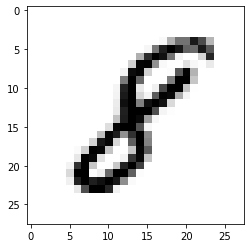

In [28]:
#visualization and data loading confirmation
import matplotlib.pyplot as plt  
%matplotlib inline 
image_index = 7777 # can be any number between 0 to 60000 
print(y_train[image_index])
plt.imshow(x_train[image_index] , cmap = 'Greys')


In [29]:
# to show the shape of the loaded dataset
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [30]:
# resashaping the pixel data arrays to have a single color channel i.e grey scale 
x_train = x_train.reshape(x_train.shape[0] , 28 , 28 , 1)
x_test = x_test.reshape(x_test.shape[0] , 28 , 28 , 1)
input_shape = (28 ,28 , 1 )

# to make sure that the datatype of the pixel matrixs is float 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalizing(puting them in the range[0,1] ) the grey scale values of the pixel by dividing it by 255(maximmum grey scale value-- for white)
x_train  /= 255  
x_test /= 255
print("x_train shape : " ,   x_train.shape)
print("the number of images in x_train: ", x_train.shape[0] )
print("the numeber of images in x_test"  ,  x_test.shape[0])


x_train shape :  (60000, 28, 28, 1)
the number of images in x_train:  60000
the numeber of images in x_test 10000


In [31]:
# definition of the cnn model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Dense , MaxPooling2D , Dropout , Flatten 

model = Sequential()# Keras API fro CNN

model.add(Conv2D(28, kernel_size=(3,3) , input_shape = input_shape)) # Convlational Layer , performs the convolution 
#(no.of filters , filter/kernel size , input_shape(by default you have to include this argument if you are taking this layer as the first layer))

model.add(MaxPooling2D(pool_size=(2,2)))  # reduces the size of the input for the neural network
# by taking the maximum element from the input matrix in according to the the pool_size = (2,2) by default)

model.add(Flatten()) # flattens the input for the nn by converting it to a vector 
model.add(Dense(128 , activation = tf.nn.relu))  #  outputs 'activation(dot(input,kernel) + bias)' , kernel is the weight matrix created by the layer  Dense(no. of units , actvatiomn function)

model.add(Dropout(0.2)) # the dropout layer randomly sets the input units to 0 ath the frequency of rate , here rate = 0.2 , it avoids the overfitting of the model 

model.add(Dense(10, activation = tf.nn.softmax))

# the above will create a basic cnn model 

In [32]:
#optimizing the model 
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

model.fit(x=x_train , y=y_train , epochs = 10)# fitting the model with 10 epochs/iterations 

Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.2210 - accuracy: 0.9336
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0863 - accuracy: 0.9734
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0597 - accuracy: 0.9808
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0461 - accuracy: 0.9852
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0354 - accuracy: 0.9881
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0309 - accuracy: 0.9896
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0239 - accuracy: 0.9921
Epoch 8/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0218 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0219 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 21s 11m

In [37]:
# model evaluation using x_test and y_test
m = model.evaluate(x_test , y_test)
print('test loss :' , m[0])
print('test accuracy : ' , m[1]*100 ,'%')



313/313 [==============================] - 1s 4ms/step - loss: 0.0608 - accuracy: 0.9853
test loss : 0.0607902817428112
test accuracy :  98.53000044822693 %


the recognised number is : 5


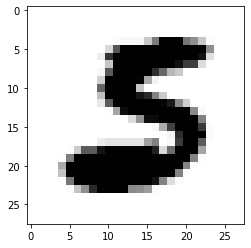

In [41]:
# prediction using our trained model
image_index = 7777
plt.imshow(x_test[image_index].reshape(28,28) , cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))

print("the recognised number is :" , pred.argmax())
